In [1]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import pandas as pd
df = pd.read_csv("datasets/ml_ready_set_unbalanced.csv")

In [2]:
df.head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,case_status_encoded,full_time_encoded
0,58032.0,58032.0,0.0,362,98.6,726,730,0,1,0,0,0,0,1
1,60967.0,95600.0,34633.0,50,96.0,506,1094,0,1,0,0,0,0,1
2,50398.0,60400.0,10002.0,362,98.6,331,364,0,1,0,0,0,0,1
3,61069.0,65000.0,3931.0,362,98.6,277,364,0,1,0,0,0,0,1
4,41392.0,49383.0,7991.0,362,98.6,219,364,0,1,0,0,0,0,1


In [3]:
from sklearn.model_selection import train_test_split
target = df["case_status_encoded"]
df = df.drop("case_status_encoded", axis=1)
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.30, random_state=42)

In [4]:
X_train.head()

,PREVAILING_WAGE,WAGE_RATE_OF_PAY_FROM,wage_diff,applications_per_employer,employer_success_rate,decision_duration,employment_duration,regions_midwest,regions_northeast,regions_other,regions_south,regions_west,full_time_encoded
593838,39062.0,47500.0,8438.0,198,99.0,7,729,1,0,0,0,0,1
359213,83366.0,83400.0,34.0,69,100.0,6,486,1,0,0,0,0,1
877947,39062.0,47507.0,8445.0,65,96.9,6,1095,0,0,0,0,1,1
594570,70034.0,77037.0,7003.0,9192,99.4,7,829,0,0,0,1,0,1
268322,77667.0,78000.0,333.0,97,100.0,4,1095,0,0,0,0,1,1


In [5]:
y_train.value_counts()

0    761114
1      9478
Name: case_status_encoded, dtype: int64

In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
print(X_train_scaled.mean(axis = 0))
print(X_test_scaled.std(axis = 0))

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\preprocessing\data.py:617: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


[-2.22164475e-16 -1.30177465e-15 -2.99051603e-17 -1.82109586e-17
 -4.57677812e-15 -4.24153973e-19  2.44054508e-16 -1.05208627e-16
  3.05390861e-17 -7.53334339e-18  6.73574951e-17  5.54304698e-17
 -1.49007135e-16]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


In [7]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [8]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
confusion_matrix(y_test, predictions)

Accuracy : 98.913%


array([[326140,    111],
       [  3478,    526]], dtype=int64)

In [14]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
predictions = model.predict(X_test)
accuracy = metrics.accuracy_score(predictions,y_test)
print ("Accuracy : %s" % "{0:.3%}".format(accuracy))
confusion_matrix(y_test, predictions)

c:\users\aidan\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Accuracy : 99.523%


array([[325866,    385],
       [  1190,   2814]], dtype=int64)

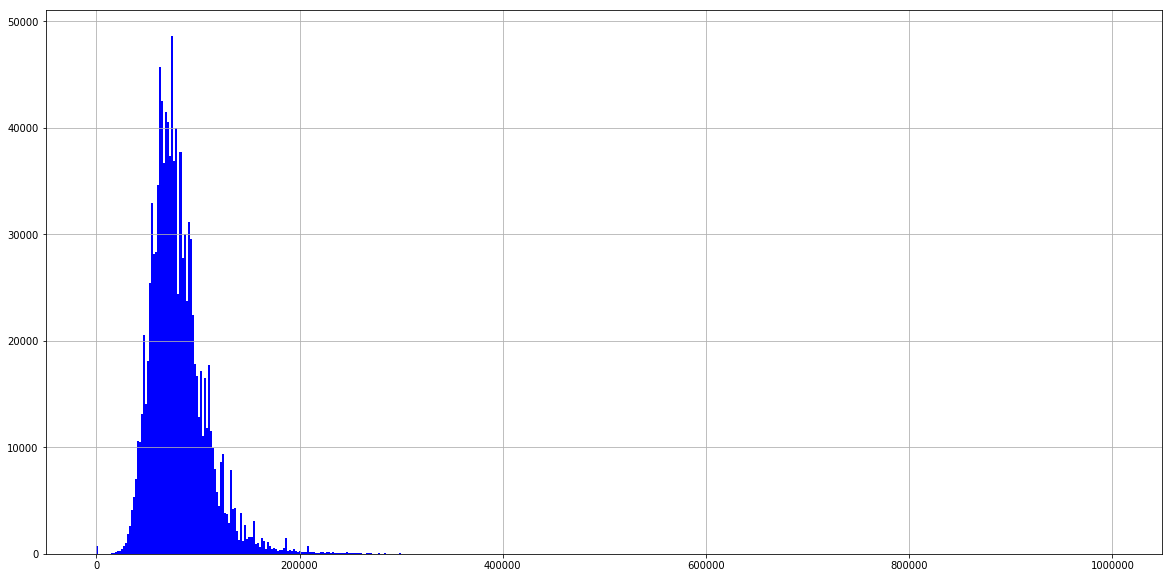

In [9]:
df["PREVAILING_WAGE"].hist(bins=500, figsize=(20,10) , color = 'b')

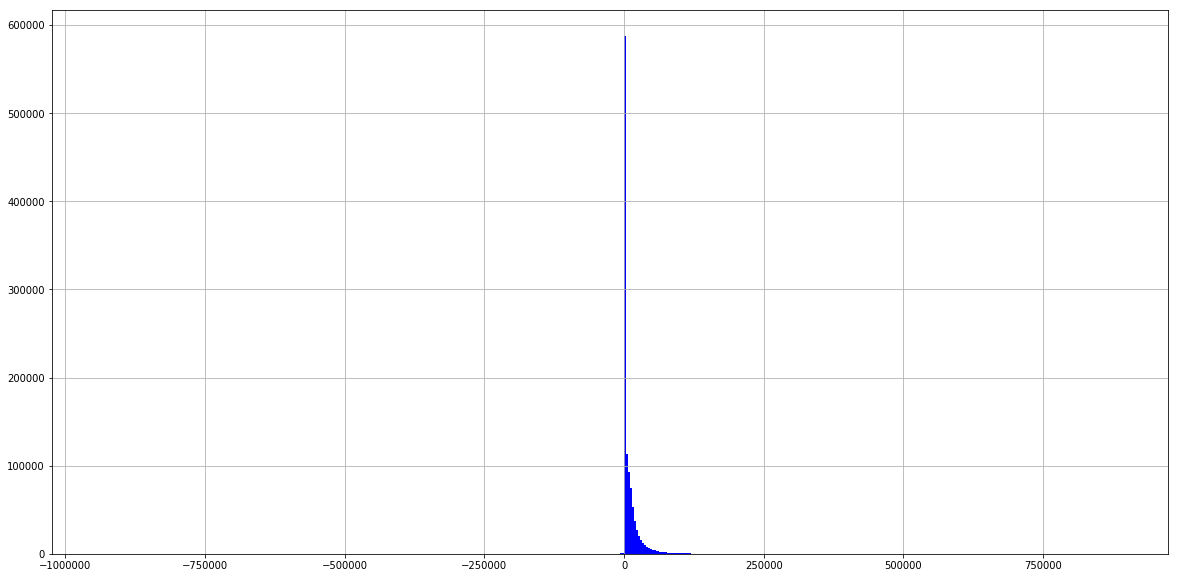

In [10]:
df["wage_diff"].hist(bins=500, figsize=(20,10) , color = 'b')

In [11]:
df["wage_diff"].mean()

9712.939684677345

In [12]:
print(df["PREVAILING_WAGE"].mean() + (df["PREVAILING_WAGE"].std() * 2))

137139.643432964


In [13]:
df = df[df["PREVAILING_WAGE"] < 200]

removed an rows with prevailing wage below 200 as these values dont make sense as it should be wage in years